In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

In [2]:
data_points=[]
max_value=10
data_length=5
for i in range(data_length):
    data_points.append([random.random()*max_value,random.random()*max_value])

In [3]:
print(data_points)

[[8.82044687027551, 6.556928438017891], [4.131670358690381, 6.7073768904537605], [0.724266101634643, 2.117578056286711], [5.916064611983495, 8.958312771569155], [1.1826284981982127, 3.667397152944579]]


In [4]:
clusters={}
# { cluster_id : [data_points] }

for i in range(len(data_points)):
    clusters.update({i:[data_points[i]]})

print(clusters)


{0: [[8.82044687027551, 6.556928438017891]], 1: [[4.131670358690381, 6.7073768904537605]], 2: [[0.724266101634643, 2.117578056286711]], 3: [[5.916064611983495, 8.958312771569155]], 4: [[1.1826284981982127, 3.667397152944579]]}


In [5]:
def euclidean_distance(a,b):
    dist=0
    for i in range(len(a)):
        dist+=(a[i]-b[i])**2
    return dist**0.5

# give the centroids point of multiple clusters
def combine_points(pointarr):
    x=0
    y=0
    for i in range(len(pointarr)):
        x+=pointarr[i][0]
        y+=pointarr[i][1]
    return [x/len(pointarr),y/len(pointarr)]

# find the minimum distance between two clusters
def find_min_dist(clusters):
    min_dist=9999
    for idx in range(len(clusters)):
        pointx=combine_points(clusters[idx])
        for idy in range(len(clusters)):
            if idx>=idy:continue
            pointy=combine_points(clusters[idy])
            dist=euclidean_distance(pointx,pointy)
            min_dist=min(min_dist,dist)
    return min_dist

# find the clusters that have minimum distance between them and make connections or edges between them
def find_connections(clusters,min_dist):
    adj_list=[[] for i in range(len(clusters))]
    for idx in range(len(clusters)):
        pointx=combine_points(clusters[idx])
        for idy in range(len(clusters)):
            if idx>=idy:continue
            pointy=combine_points(clusters[idy])
            dist=euclidean_distance(pointx,pointy)
            if dist==min_dist:
                adj_list[idx].append(idy)
                adj_list[idy].append(idx)

    return adj_list

# merge the clusters
def bfs_merge_cluster(src,clusters,adj_list,visited):
    queue=[src]
    new_cluster=[]

    while queue:
        idx=queue.pop(0)
        if visited[idx]:continue

        visited[idx]=True
        for indx in range(len(clusters[idx])):
            new_cluster.append(clusters[idx][indx])
            
        for idy in adj_list[idx]:
            if visited[idy]:continue
            queue.append(idy)
            
    return new_cluster

In [6]:
def update_cluster(clusters):
    new_clusters={}

    adj_list=find_connections(clusters,find_min_dist(clusters))
    visited=[False for i in range(len(clusters))]
    id_count=0;
    for idx in range(len(clusters)):
        
        if visited[idx]:continue

        new_cluster=bfs_merge_cluster(idx,clusters,adj_list,visited)
        
        new_clusters.update({id_count:new_cluster})
        id_count+=1

    return new_clusters



In [7]:
def print_clusters(clusters):
    print("clusters len : ",len(clusters))
    for idx in clusters:
        print(idx,":",clusters[idx])
    print("\n\n")

In [8]:
def plot_clusters(clusters):
    for idx in range(len(clusters)):
        x=[]
        y=[]
        for idy in range(len(clusters[idx])):
            x.append(clusters[idx][idy][0])
            y.append(clusters[idx][idy][1])
        color=np.random.rand(3,)
        centroid=combine_points(clusters[idx])
        plt.scatter(x,y,c=color)
        plt.scatter(centroid[0],centroid[1],c=color,marker='*')
    plt.show()

In [9]:
def agglomerative_clustering(clusters):
    while len(clusters)>1:
        print_clusters(clusters)
        plot_clusters(clusters)
        clusters=update_cluster(clusters)

    print_clusters(clusters)
    plot_clusters(clusters)

clusters len :  5
0 : [[8.82044687027551, 6.556928438017891]]
1 : [[4.131670358690381, 6.7073768904537605]]
2 : [[0.724266101634643, 2.117578056286711]]
3 : [[5.916064611983495, 8.958312771569155]]
4 : [[1.1826284981982127, 3.667397152944579]]





/var/folders/x7/9ty2h5cs0716vwyxytpxwh_m0000gn/T/ipykernel_1941/3006488587.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x,y,c=color)
/var/folders/x7/9ty2h5cs0716vwyxytpxwh_m0000gn/T/ipykernel_1941/3006488587.py:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(centroid[0],centroid[1],c=color,marker='*')


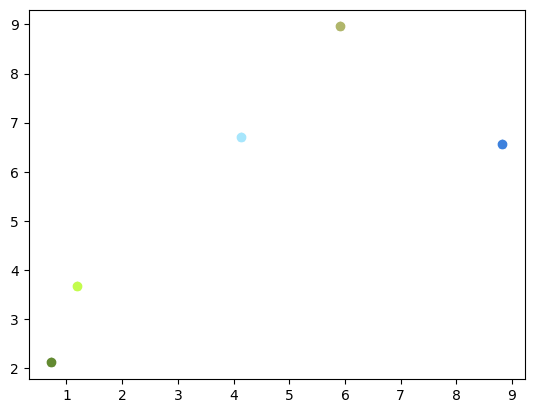

clusters len :  4
0 : [[8.82044687027551, 6.556928438017891]]
1 : [[4.131670358690381, 6.7073768904537605]]
2 : [[0.724266101634643, 2.117578056286711], [1.1826284981982127, 3.667397152944579]]
3 : [[5.916064611983495, 8.958312771569155]]





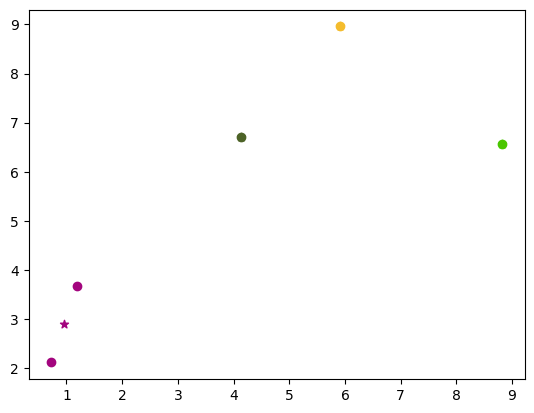

clusters len :  3
0 : [[8.82044687027551, 6.556928438017891]]
1 : [[4.131670358690381, 6.7073768904537605], [5.916064611983495, 8.958312771569155]]
2 : [[0.724266101634643, 2.117578056286711], [1.1826284981982127, 3.667397152944579]]





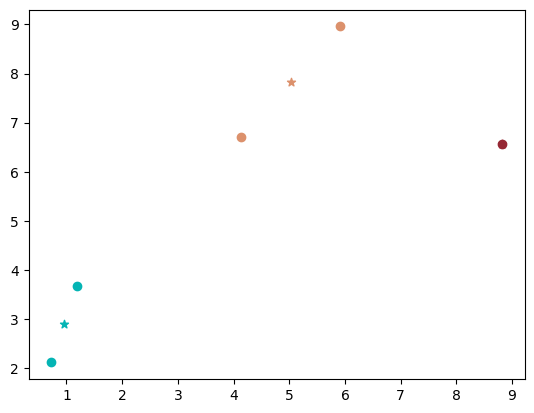

clusters len :  2
0 : [[8.82044687027551, 6.556928438017891], [4.131670358690381, 6.7073768904537605], [5.916064611983495, 8.958312771569155]]
1 : [[0.724266101634643, 2.117578056286711], [1.1826284981982127, 3.667397152944579]]





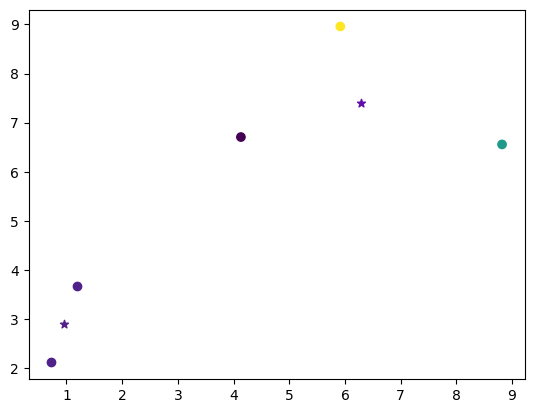

clusters len :  1
0 : [[8.82044687027551, 6.556928438017891], [4.131670358690381, 6.7073768904537605], [5.916064611983495, 8.958312771569155], [0.724266101634643, 2.117578056286711], [1.1826284981982127, 3.667397152944579]]





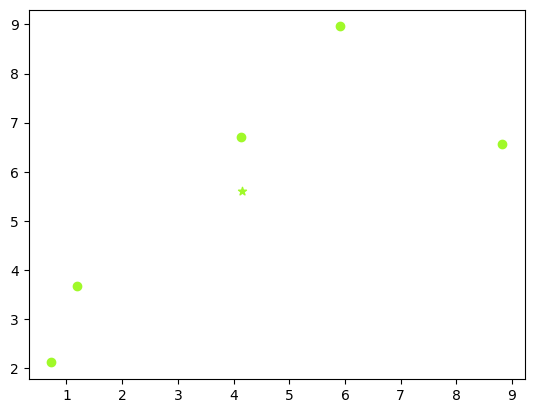

In [10]:
agglomerative_clustering(clusters)